In [2]:
import pandas as pd
import json
import numpy as np
import pylab
import datetime


import matplotlib.pyplot as plt

json_filename='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/Data_tweets/clean_tweet.json'
     
tweet_df = pd.read_json(json_filename, orient="columns")
pd.to_datetime(tweet_df['timestamp'])

0       2017-10-13 12:06:32
10      2017-10-13 19:58:42
100     2017-10-14 18:39:00
10000   2017-10-15 12:46:11
10001   2017-10-15 12:46:11
10002   2017-10-15 12:46:11
10003   2017-10-15 12:46:11
10004   2017-10-15 12:46:12
10005   2017-10-15 12:46:12
10006   2017-10-15 12:46:17
10007   2017-10-15 12:46:18
10008   2017-10-15 12:46:18
10009   2017-10-15 12:46:24
1001    2017-10-14 21:58:06
10010   2017-10-15 12:46:26
10011   2017-10-15 12:46:28
10013   2017-10-15 12:46:31
10014   2017-10-15 12:46:31
10015   2017-10-15 12:46:33
10016   2017-10-15 12:46:34
10017   2017-10-15 12:46:38
10018   2017-10-15 12:46:47
10019   2017-10-15 12:46:50
1002    2017-10-14 21:58:22
10020   2017-10-15 12:46:50
10021   2017-10-15 12:46:54
10022   2017-10-15 12:46:55
10023   2017-10-15 12:46:57
10024   2017-10-15 12:46:58
10025   2017-10-15 12:47:04
                ...        
9971    2017-10-15 12:44:58
9972    2017-10-15 12:44:59
9973    2017-10-15 12:44:59
9974    2017-10-15 12:45:02
9975    2017-10-15 1

In [ ]:
h,m=0,0
for i in range(len(tweet_df['hashtag'])):
    if len(tweet_df['hashtag'].iloc[i])>=1:
        h+=1
    if len(tweet_df['mention'].iloc[i])>=1:
        m+=1
print(h,m)

# 1_ Hashtags

## frequence analyse

In [2]:
import string
import nltk
from collections import Counter
tweet_df['hashtag'] = tweet_df['hashtag'].str.replace('#', ' ')
tweet_df['hashtag'] = tweet_df['hashtag'].str.lower()
remove_ponctuation = lambda x: ''.join(ch for ch in x if ch not in set(string.punctuation))
tweet_df['hashtag']=tweet_df['hashtag'].map(remove_ponctuation)
#nltk.word_tokenize(tweet_df['hashtag'][28])
#create a tab with all the # for frequence analysis
hashtag=[]
for text in tweet_df['hashtag']:
    T=nltk.word_tokenize(text)
    
    for j in range(len(T)):
        #print(T[j].lower())
        hashtag.append(T[j].lower())


# uniformisation of the '#'

In [14]:
# 1: Tariq ramadan tweets : 'tariq', 'ramadan', 'tarikramadan', 'tariqramadan'
TR=['tariq', 'ramadan', 'tarikramadan', 'tariqramadan']
for word in TR:
    for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='tariqramadan'

    
# 2: 'polanski' , 'romanpolanski, 'roman'

POL=['polanski' , 'romanpolanski', 'roman']
for word in POL:
    for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='romanpolanski'
    
# 3: 'Weisntein', 'harveyweinstein', 'harvey',
WEI=['weisntein','weinstein', 'harveyweinstein', 'harvey']
for word in WEI:
    for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='harveyweinstein'
# 4: 'zemmour','zemour' 'ericzemour', 'ericzemmour', 'eric'

ZEM=['zemmour','zemour' 'ericzemour', 'ericzemmour', 'eric']
for word in ZEM:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='ericzemmour'

# 5: 'gilbertrozon', 'rozon', 'gilbert'
ROZ=['gilbertrozon', 'rozon', 'gilbert']
for word in ROZ:
    for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='gilbertrozon'
# 6: 'jeanlassalle', 'lassalle' 'jean', 'jeanlassalle'
LAS=['jeanlassalle', 'lassalle','lassalle' 'jean', 'jeanlassalle']
for word in LAS:
    for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='jeanlassalle'

# 7: 'morandinilive', 'morandini', 'jeanmarcmorandini', 'jean-marcmorandini', 'jeanmarc', 'jean-marc'
MOR=['morandinilive', 'morandini', 'jeanmarcmorandini', 'jean-marcmorandini', 'jeanmarc', 'jean-marc']
for word in MOR:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='morandini'

# 8 : 'deneuve', 'catherinedeneuve', 'catherinedeneuve', 'catherine'
DEN=['deneuve', 'catherinedeneuve', 'catherinedeneuve', 'catherine']
for word in DEN:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='catherinedeneuve'

#9 : 'baupin', 'denisbaupin', 'denis'
BAU=['baupin', 'denisbaupin', 'denis']
for word in BAU:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='denisbaupin'

#10: 'pierrejoxe', 'joxe'
JOX=['pierrejoxe', 'joxe']
for word in JOX:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='pierrejoxe'

# 11: 'hendaayari', 'henda', 'aayari'
     
HEN=['hendaayari', 'henda', 'aayari']
for word in HEN:
     for i in range(len(hashtag)):
        if hashtag[i]==word:
            hashtag[i]='hendaayari'

PERSON=['tariqramadan','hendaayari','romanpolanski','harveyweinstein','ericzemmour','gilbertrozon','jeanlassalle','morandini','catherinedeneuve','denisbaupin','pierrejoxe']

[('balancetonporc', 59829), ('metoo', 3760), ('moiaussi', 991), ('harveyweinstein', 791), ('balancetatruie', 741), ('tariqramadan', 527), ('harcelement', 434), ('balancetonraciste', 319), ('ggrmc', 180), ('macron', 171), ('tpmp', 163), ('viol', 155), ('romanpolanski', 155), ('femmes', 146), ('balance', 134), ('gilbertrozon', 120), ('twitter', 108), ('polqc', 107), ('balancestonporc', 104), ('ericzemmour', 94), ('france', 88), ('lemissionpolitique', 88), ('onpc', 82), ('quotidien', 82), ('dsk', 81), ('harcelementsexuel', 80), ('sexisme', 75), ('balancetonpervers', 75), ('balancetacochonne', 74), ('balancetapute', 72), ('justice', 67), ('martinique', 63), ('cultureduviol', 62), ('porc', 58), ('slt', 58), ('balancetonchiffre', 56), ('agressionsexuelle', 55), ('balancetonagresseur', 53), ('feminisme', 53), ('pierrejoxe', 53), ('lrem', 51), ('politique', 50), ('fn', 50), ('hashtag', 50), ('bfmtv', 50), ('harcelementderue', 49), ('balancetonmecsupercool', 48), ('morandini', 46), ('notallmen'

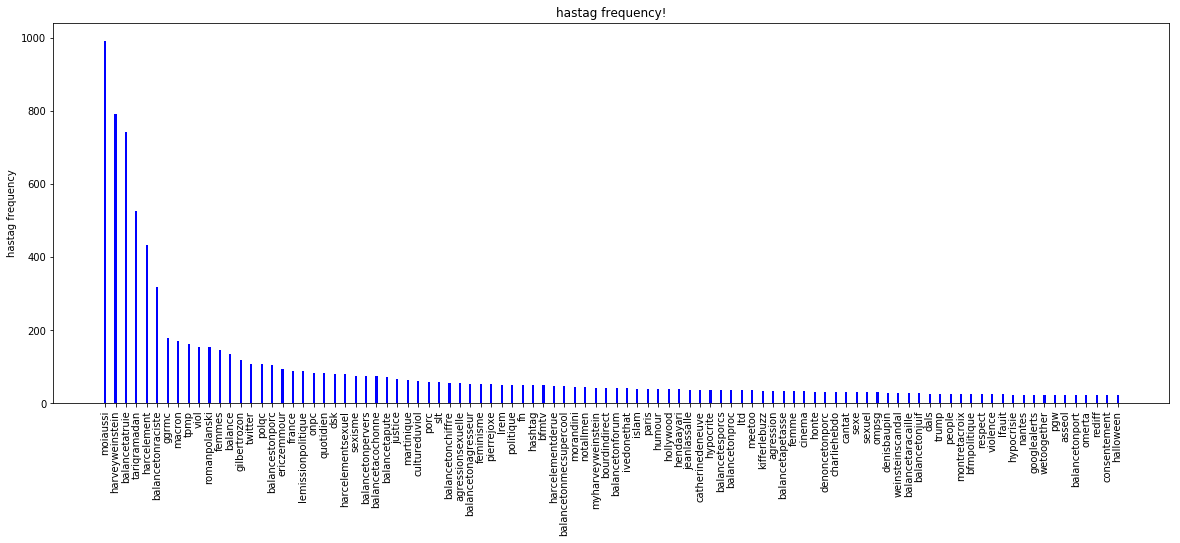

In [9]:
x=Counter(hashtag)
H=x.most_common()
h=[]
b=[]
for i in range(2,100):
    h.append(H[i][1])
    b.append(H[i][0])
fig_h = plt.figure(figsize = (20, 7))
#date = data.index.date.astype('O')
print(H[:250])
print(sum(h))
print(len(hashtag))

x = range(len(b[:100]))
height = h[:100]
labels=b
width = 0.2
plt.tight_layout() #ajustement des etiquttes
plt.bar(x, height, width, color='b')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('hastag frequency')
plt.title('hastag frequency!')
plt.show()



## Time Analysis

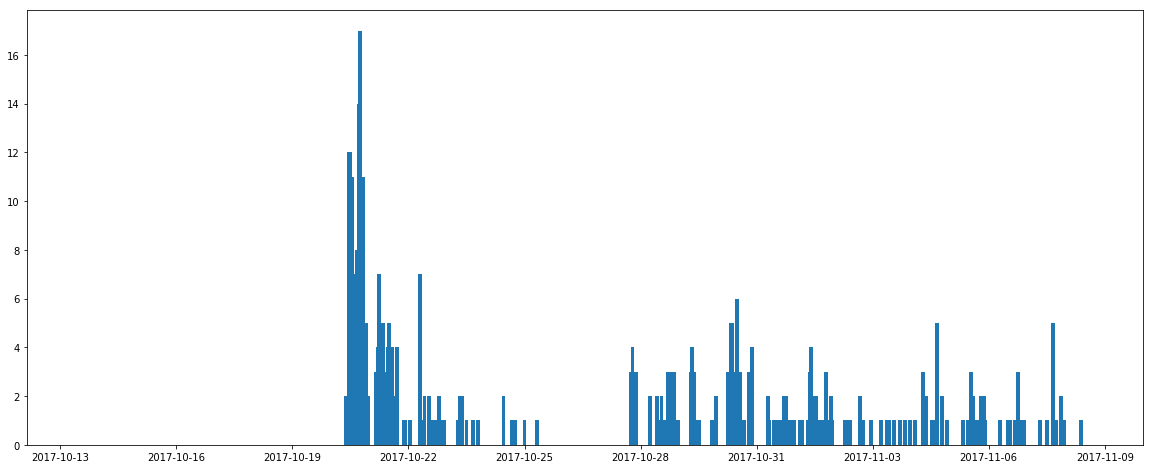

In [12]:

#use of one hashtag
hashtagR='tariqramadan'
find_hashtag=lambda x: x.find(hashtagR)
#We create group os series by hour
dataH=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('H'))['hashtag']

#  We create a function that enable to count the number of occurance of a hastag in a serie given

def counthashtag(serie,hashtagR):
    find_hashtag=lambda x: x.find(hashtagR)
    c=0
    for k in range(len(serie)):
        text=serie.iloc[k].lower()
        if find_hashtag(text)>=1:
            c+=1
    return(c)

# We apply this function to our groups
selecH=dataH.apply(counthashtag,hashtagR)
#we create the two tab for the plot
t=selecH.index.tolist()
height=selecH.values.tolist()

#we plot the result
fig1 = plt.figure(figsize = (20, 8))
width=0.1
plt.bar(t, height, width)
plt.show()

#S=0      
#for index, values in enumerate(selecH):
#    #S+=values
#    if values>0:
#        print(values,selecH.index[index])

#for t in range((5)):
#   try:
#       print(find_hashtag(tweet_df['hashtag'][t]),tweet_df['hashtag'][t])
#   except:
#       print('pas de #')

736619.666667
628


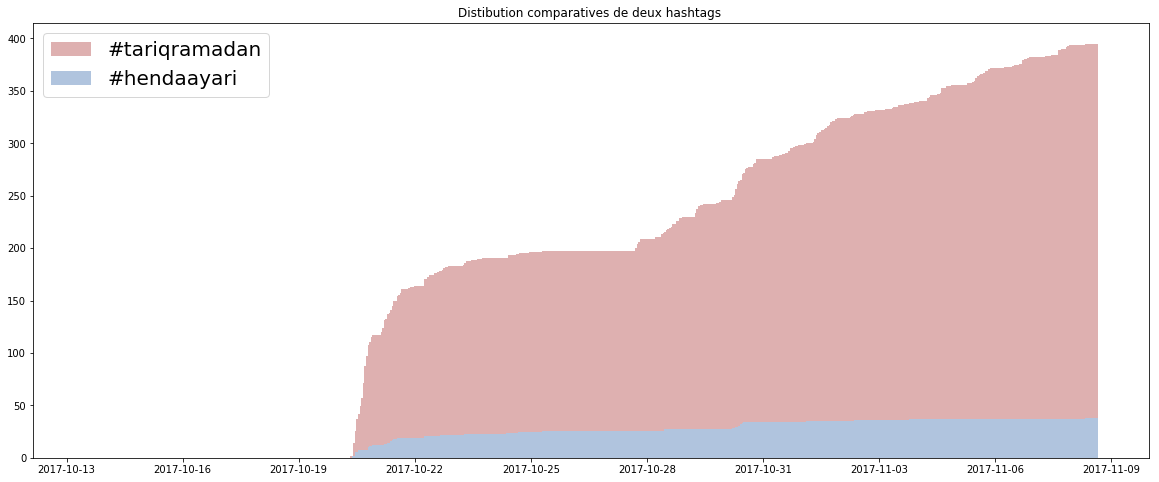

In [61]:
# compare to graph
from matplotlib.dates import date2num
selecH1=dataH.apply(counthashtag,'tariqramadan')
selecH2=dataH.apply(counthashtag,'hendaayari')

height_H1=selecH1.values.tolist()
height_H2=selecH2.values.tolist()

cumuH1=[height_H1[0]]
cumuH2=[height_H2[0]]
for i in range(len(height_H)-1):
    cumuH1.append(cumuH1[i]+height_H1[i+1])
    cumuH2.append(cumuH2[i]+height_H2[i+1])
        
fig = plt.figure(figsize = (20, 8))
ax = plt.subplot(111)
width=0.1
t=selecH1.index.tolist()
x = date2num(t)
print(x[100])
print(len(x))
#plt.axis([x[150],x[300],0,50])
P1=ax.bar(t, cumuH1, width, facecolor='#deb0b0')
P2=ax.bar(t, cumuH2, width, facecolor='#b0c4de')
ax.legend( (P1[0], P2[0]), ('#tariqramadan', '#hendaayari'),prop={'size': 20} )

titre='Distibution comparatives de deux hashtags '
plt.title(titre)
plt.show()

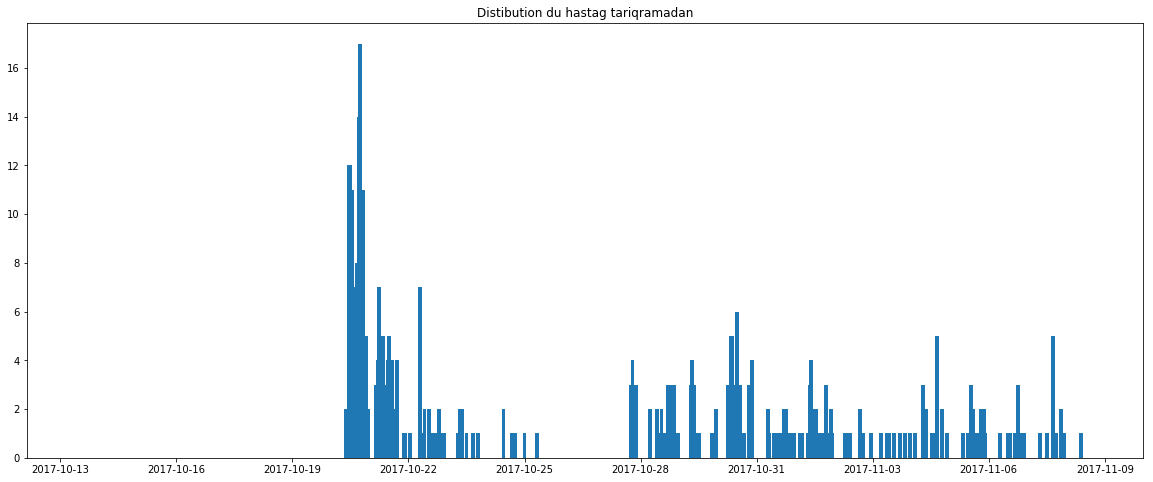

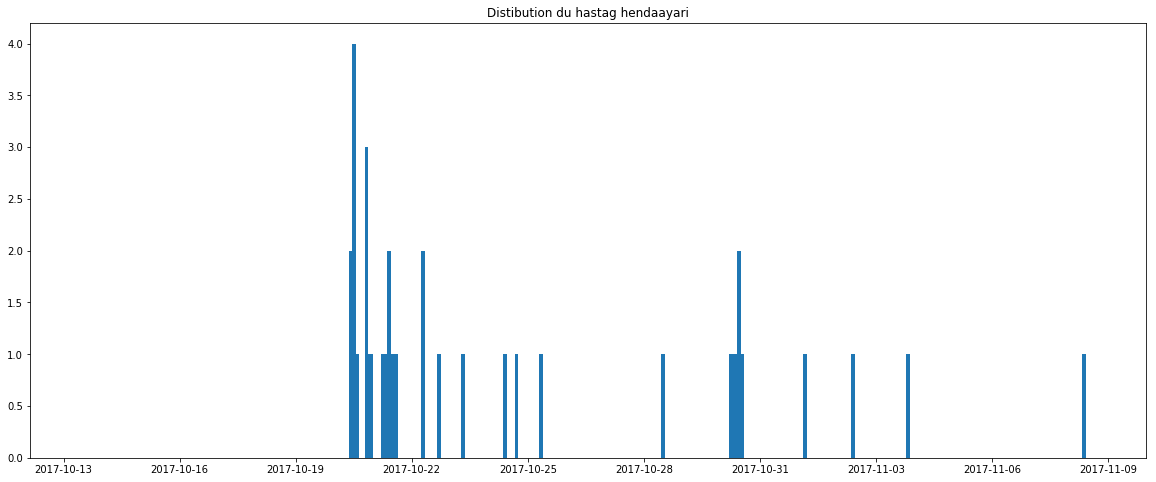

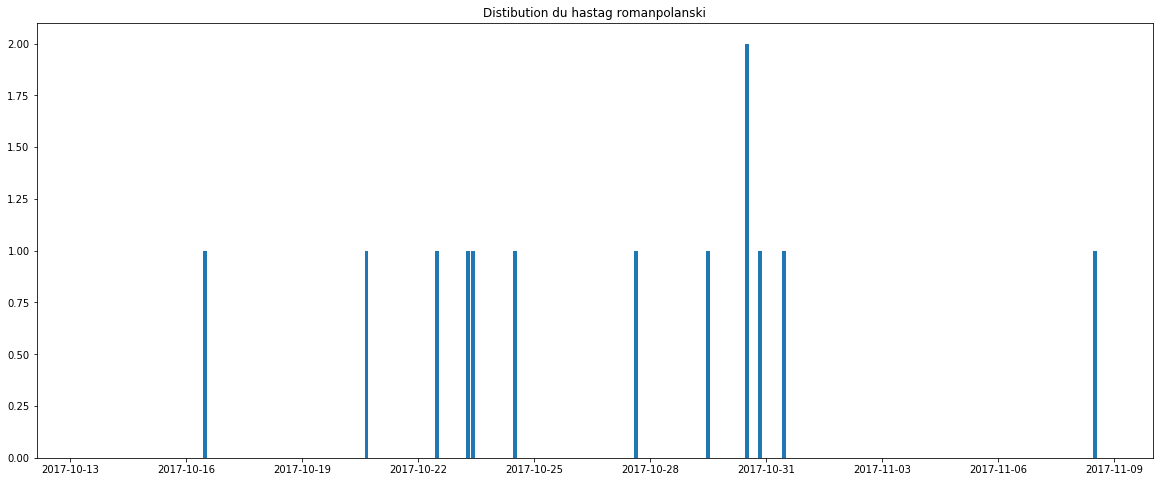

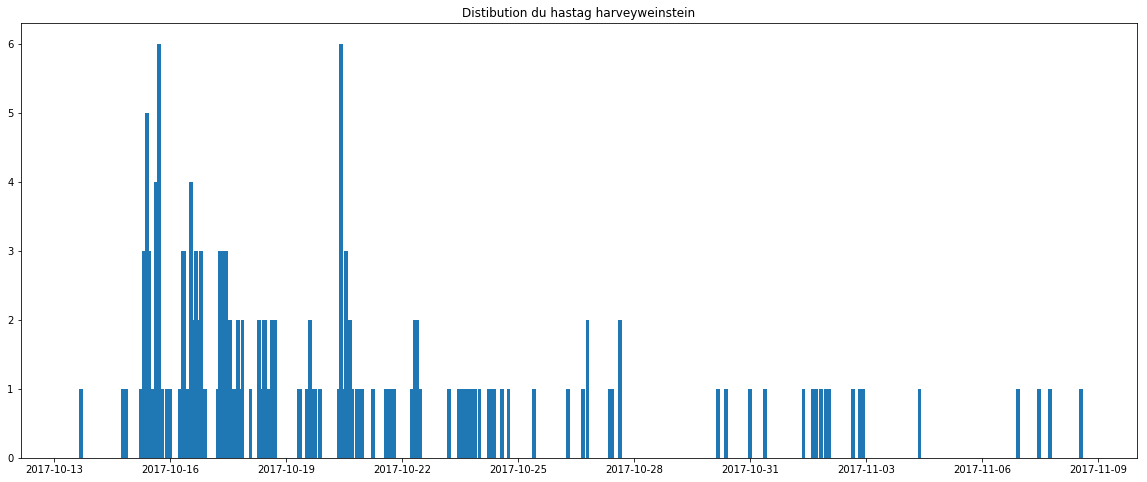

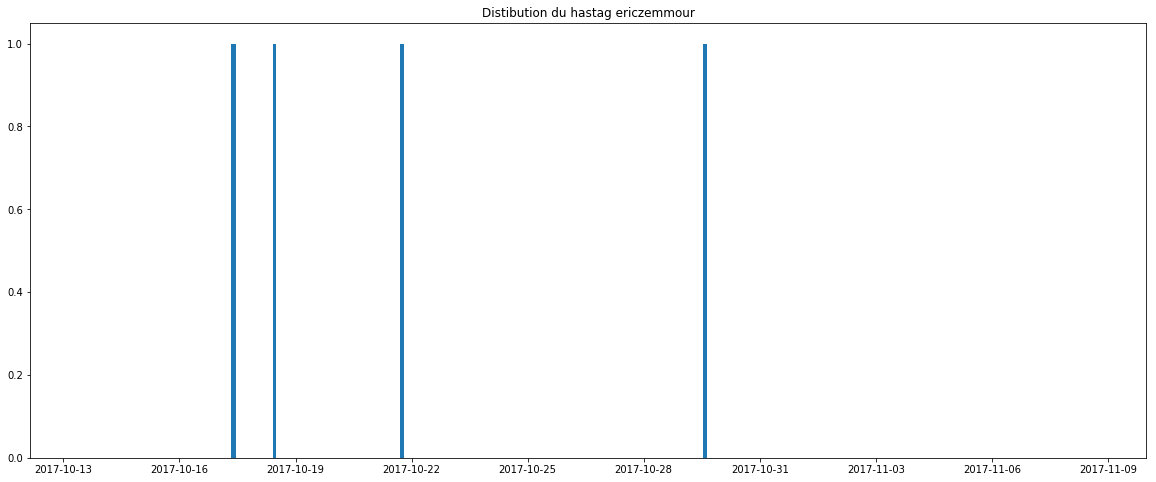

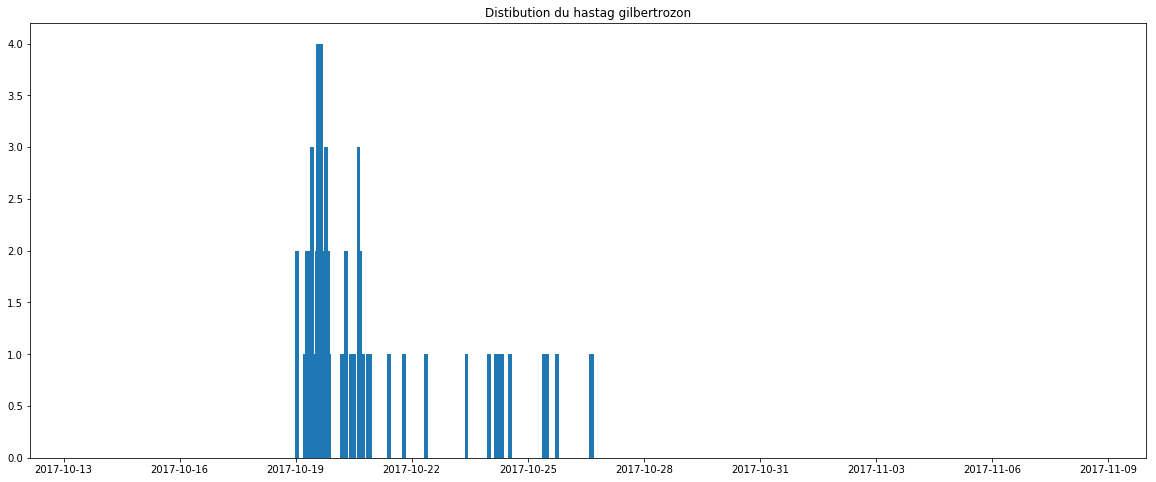

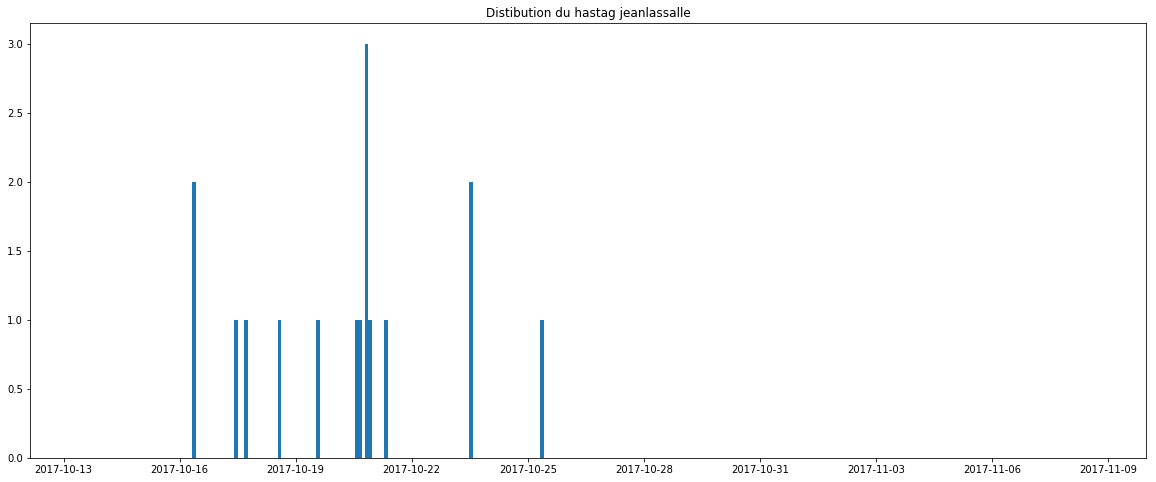

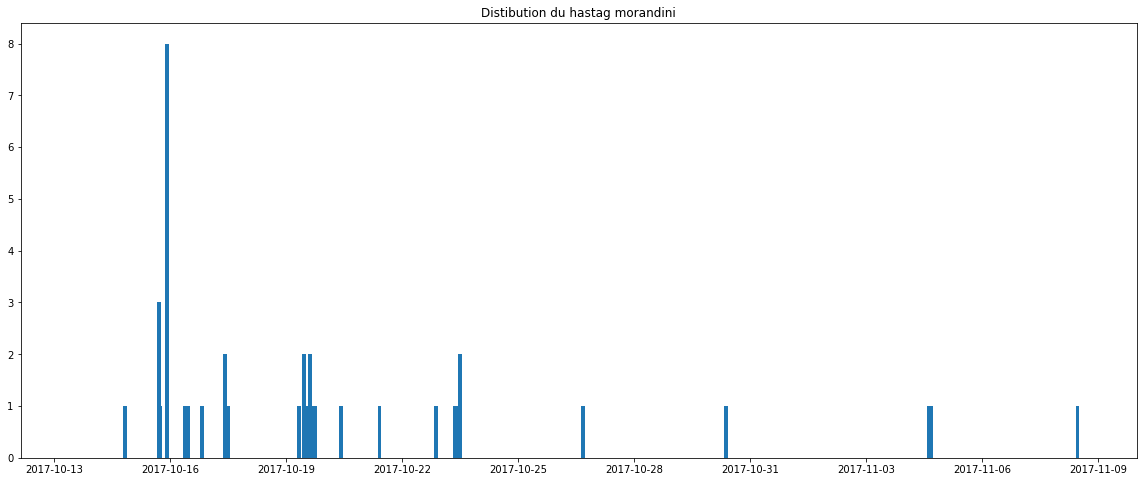

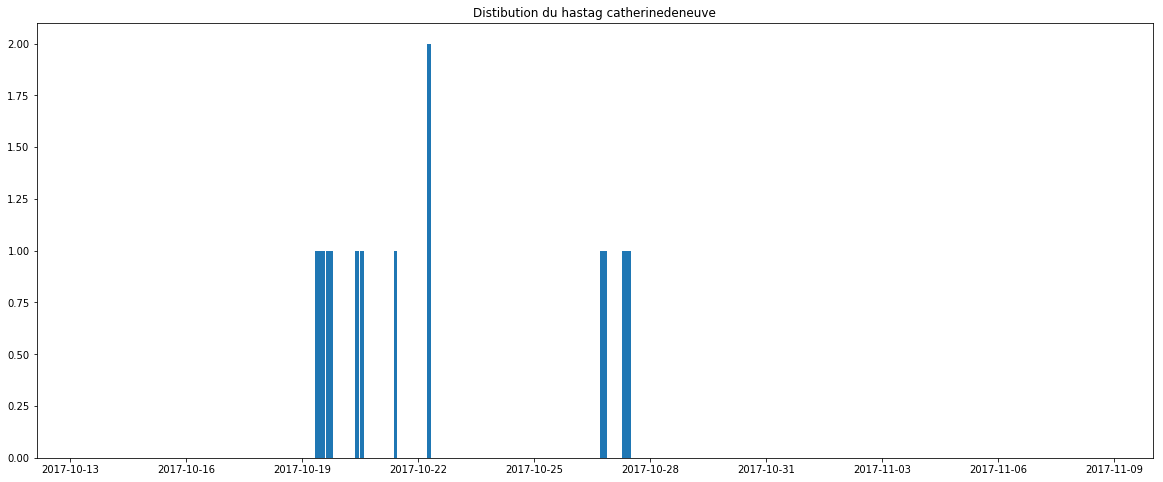

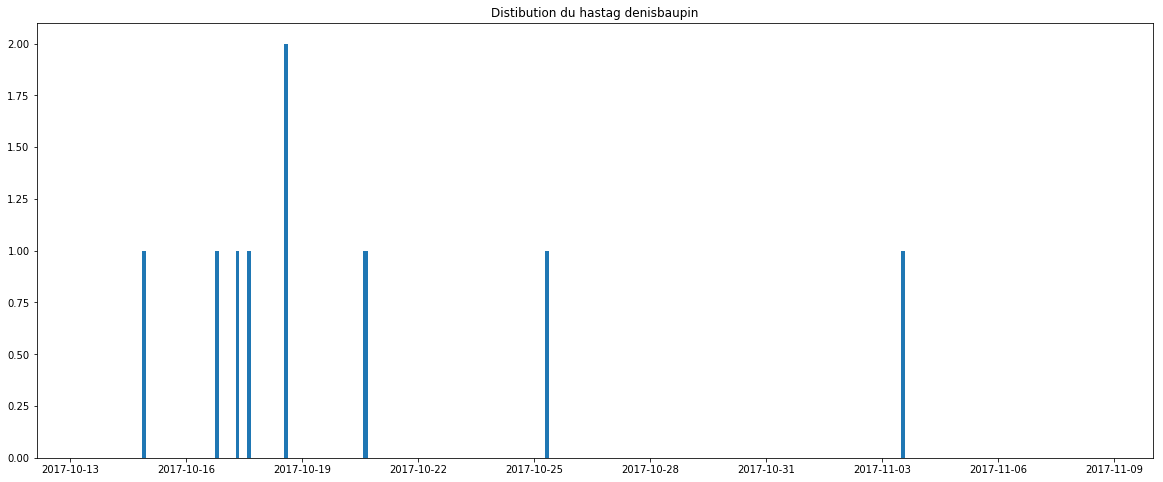

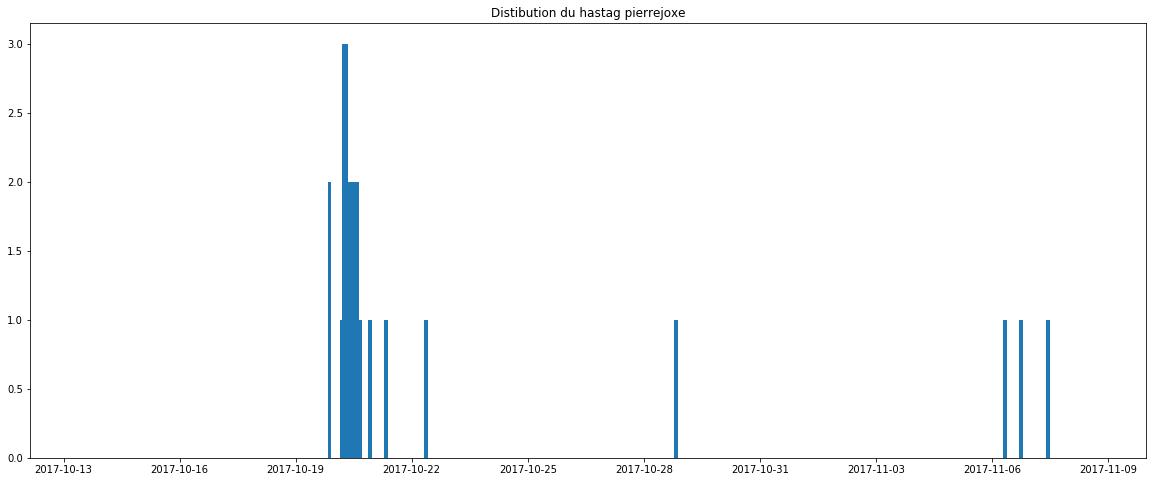

In [16]:

for text in PERSON: #ou b[:20]
    selecH=dataH.apply(counthashtag,text)
#we create the two tab for the plot
    t=selecH.index.tolist()
    height_H=selecH.values.tolist()
    cumuH=[height_H[0]]
    for i in range(len(height_H)-1):
        cumuH.append(cumuH[i]+height_H[i+1])
    fig1 = plt.figure(figsize = (20, 8))
    width=0.1
    plt.bar(t, height_H, width)
    titre='Distibution du hastag '+ str(text)
    plt.title(titre)
    plt.show()
    
    

# 2_ Mentions

In [3]:
######## Mentions
tweet_df['mention']=tweet_df['mention'].str.replace('@', ' ')
tweet_df['mention']=tweet_df['mention'].map(remove_ponctuation)

mention=[]
users=0
for i in range(len(tweet_df['mention'])):
    if len(tweet_df['mention'].iloc[i])>0:
        users+=1
        g=nltk.word_tokenize(tweet_df['mention'].iloc[i])
        for j in range(len(g)):
            mention.append(g[j].lower())

NameError: name 'remove_ponctuation' is not defined

[('youtube', 349), ('balancetonporc', 253), ('libe', 217), ('marleneschiappa', 183), ('franceinfo', 166), ('lemondefr', 148), ('slatefr', 147), ('franceinter', 140), ('lobs', 128), ('laparisienne', 112), ('causeur', 107), ('tariqramadan', 100), ('bfmtv', 94), ('lettreaudio', 90), ('brunolemaire', 83), ('emmanuelmacron', 77), ('ericbrunet', 73), ('lesinrocks', 61), ('valeurs', 53), ('lexpress', 49), ('lepoint', 47), ('laurentbouvet', 46), ('cnews', 44), ('cinemathequefr', 42), ('graldinemaillet', 39), ('lci', 38), ('nbelloubet', 37), ('cyrilhanouna', 34), ('carolinedehaas', 34), ('franceculture', 31), ('jeanlassalle', 31), ('bhl', 31), ('elevycauseur', 30), ('mediapart', 30), ('caronaymericoff', 29), ('assembleenat', 29), ('osezlefeminisme', 29), ('asiaargento', 29), ('bvoltaire', 29), ('memoiretrauma', 28), ('sandrousseau', 27), ('gilrozon', 27), ('michelsapin', 25), ('christineboutin', 25), ('qofficiel', 24), ('rmcinfo', 23), ('jeremstar', 23), ('npolony', 22), ('pierremenes', 21), ('

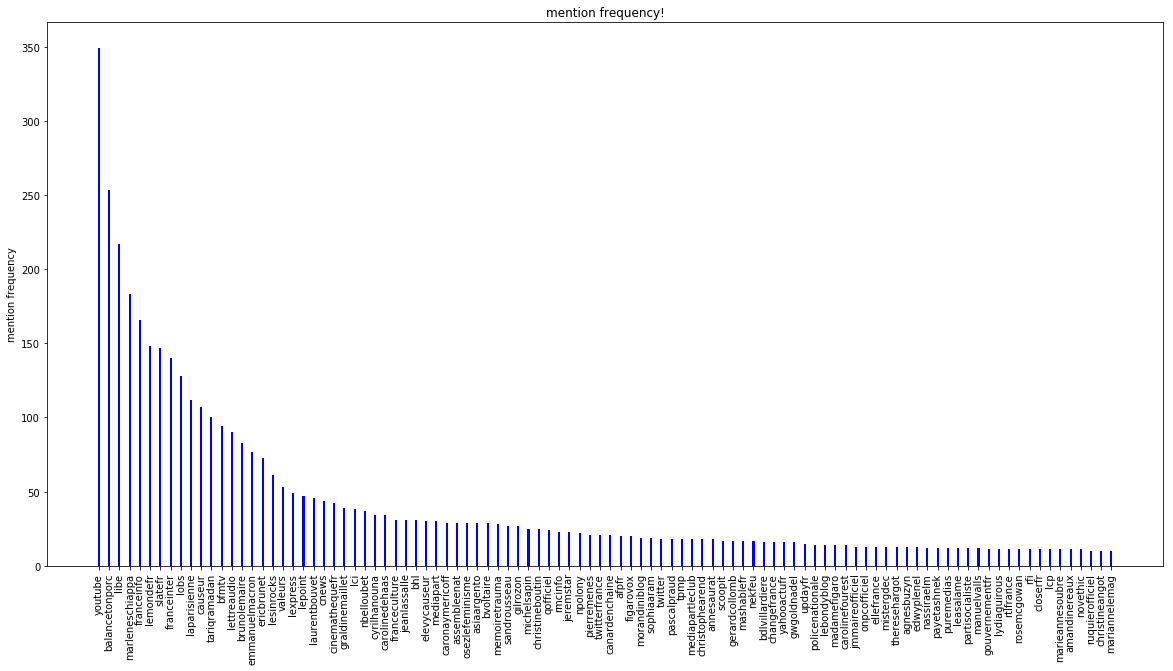

In [63]:
y=Counter(mention)
M=y.most_common()
hm=[]
bm=[]
for i in range(100):
    hm.append(M[i][1])
    bm.append(M[i][0])
fig_m = plt.figure(figsize = (20, 10))
#date = data.index.date.astype('O')
xm = range(len(bm))
print(M[:50])
height = hm
labels=bm
width = 0.2
plt.tight_layout() #ajustement des etiquttes
plt.bar(xm, height, width, color='b')
plt.xticks(xm, labels, rotation='vertical')
plt.ylabel('mention frequency')
plt.title('mention frequency!')
plt.show()

In [ ]:
print(M[:50])
print ( "il y a eu ",len(M),"mentions utilisée")
print((users,'personnes ont utilisé une ou plusieurs mentions'))

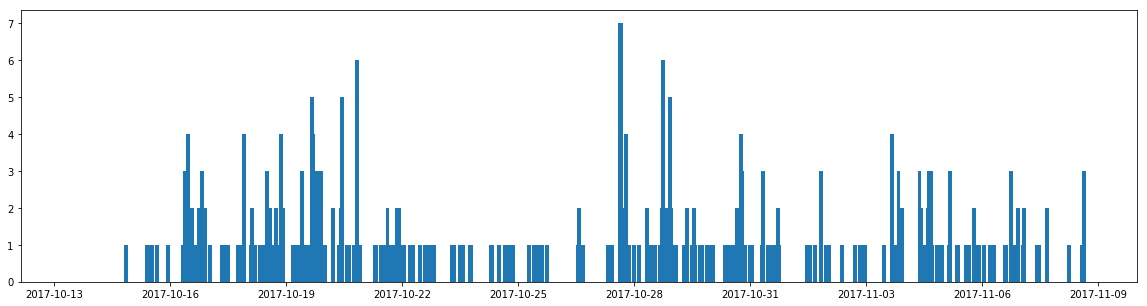

In [64]:
#use of one mention
mentionR='youtube'
find_hashtag=lambda x: x.find(hashtagR)
#We create group os series by hour
dataM=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('H'))['mention']

#  We create a function that enable to count the number of occurance of a hastag in a serie given

def counthashtag(serie,hashtagR):
    find_hashtag=lambda x: x.find(hashtagR)
    c=0
    for k in range(len(serie)):
        text=serie.iloc[k].lower()
        if find_hashtag(text)>=1:
            c+=1
    return(c)

# We apply this function to our groups
selecM=dataM.apply(counthashtag,mentionR)
#we create the two tab for the plot
t=selecM.index.tolist()
height=selecM.values.tolist()

#we plot the result
fig1 = plt.figure(figsize = (20, 5))
width=0.1
plt.bar(t, height, width)
plt.show()

#S=0      
#for index, values in enumerate(selecH):
#    #S+=values
#    if values>0:
#        print(values,selecH.index[index])

#for t in range((5)):
#   try:
#       print(find_hashtag(tweet_df['hashtag'][t]),tweet_df['hashtag'][t])
#   except:
#       print('pas de #')

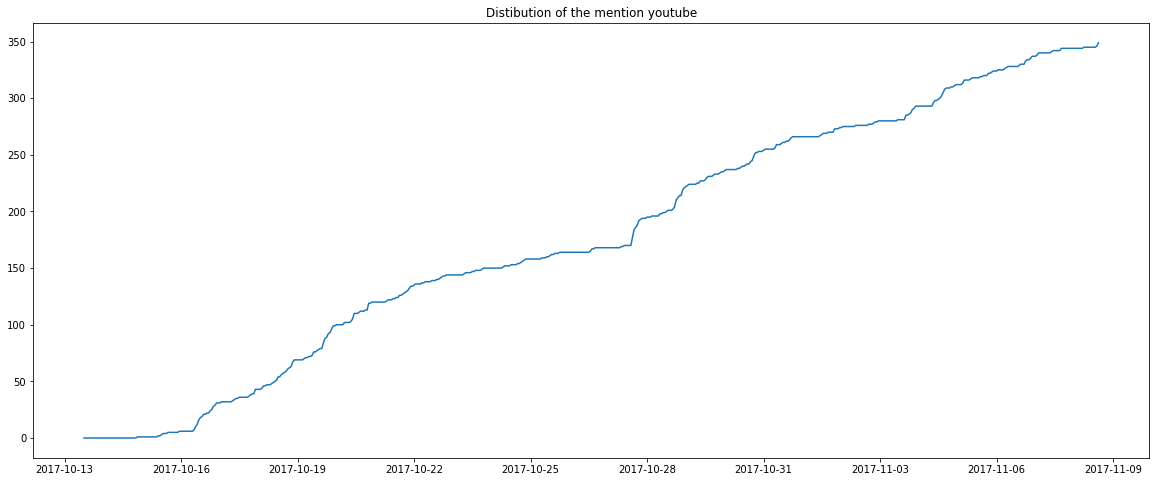

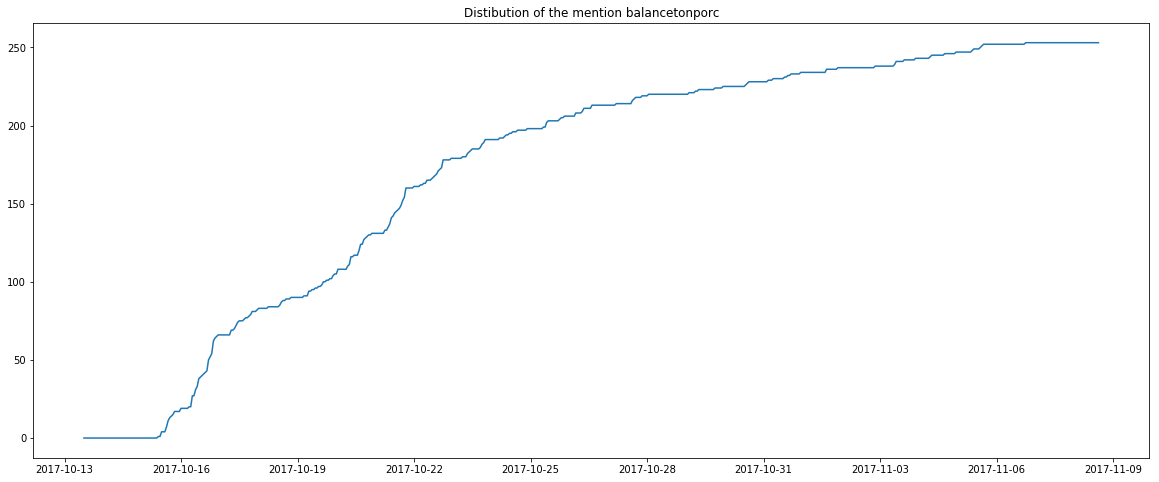

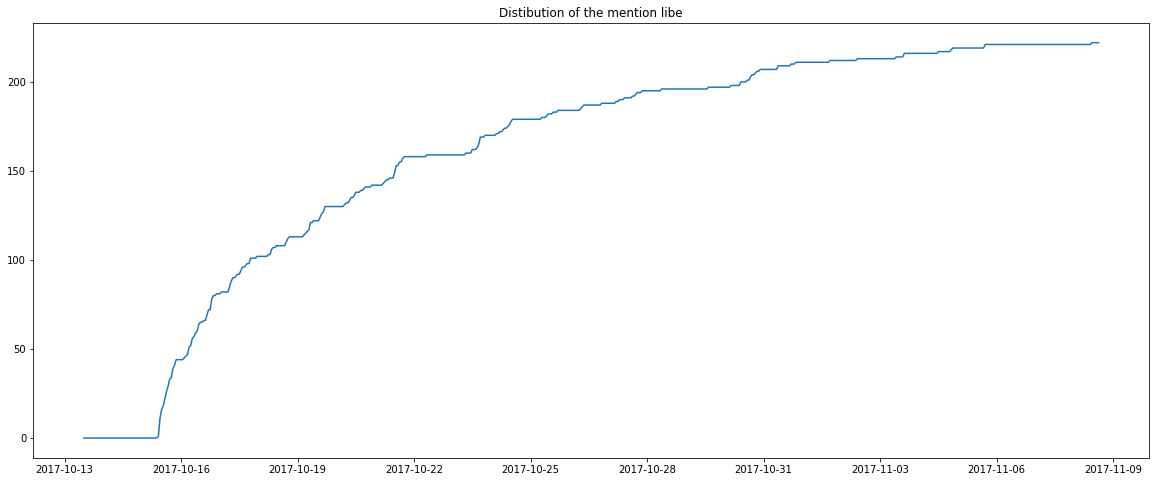

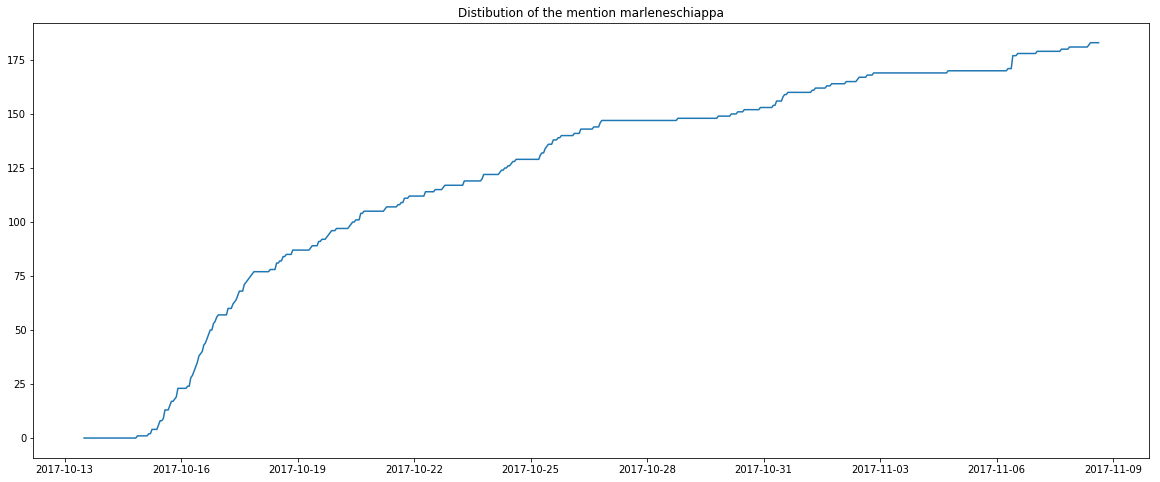

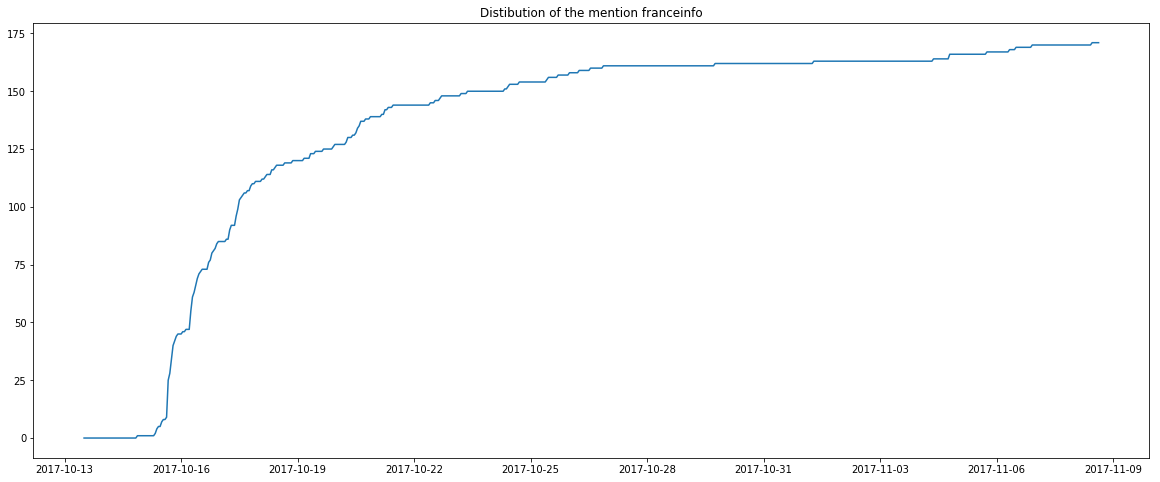

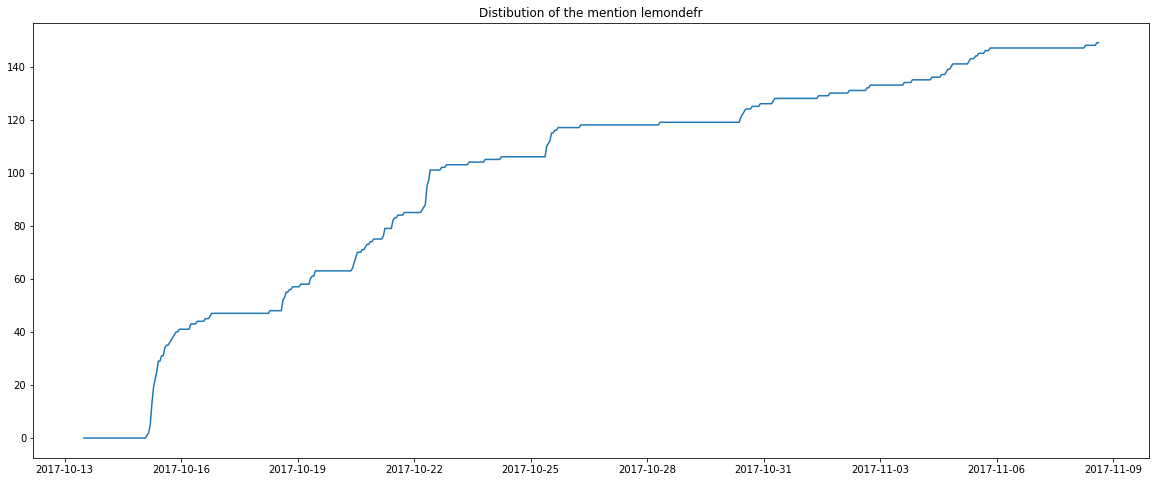

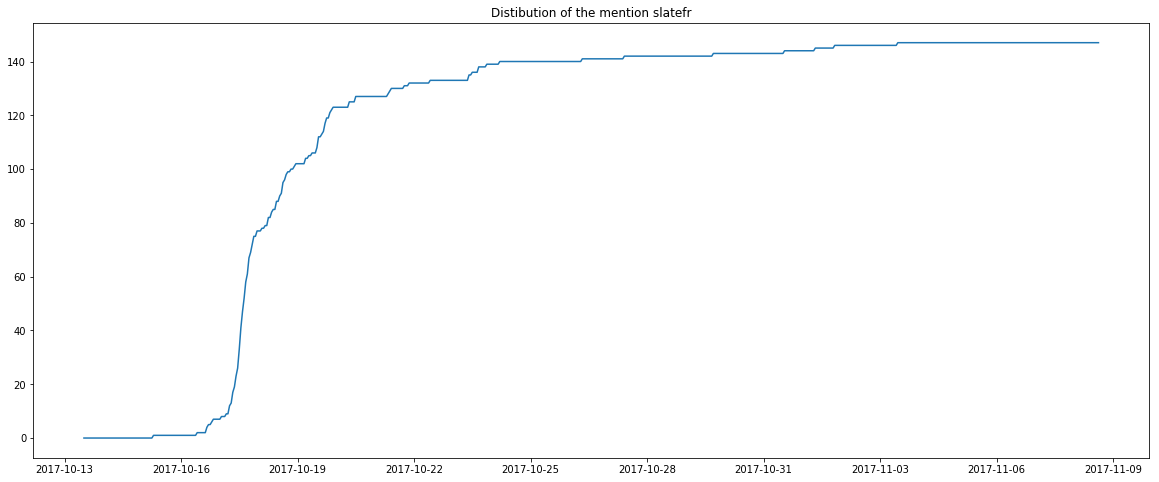

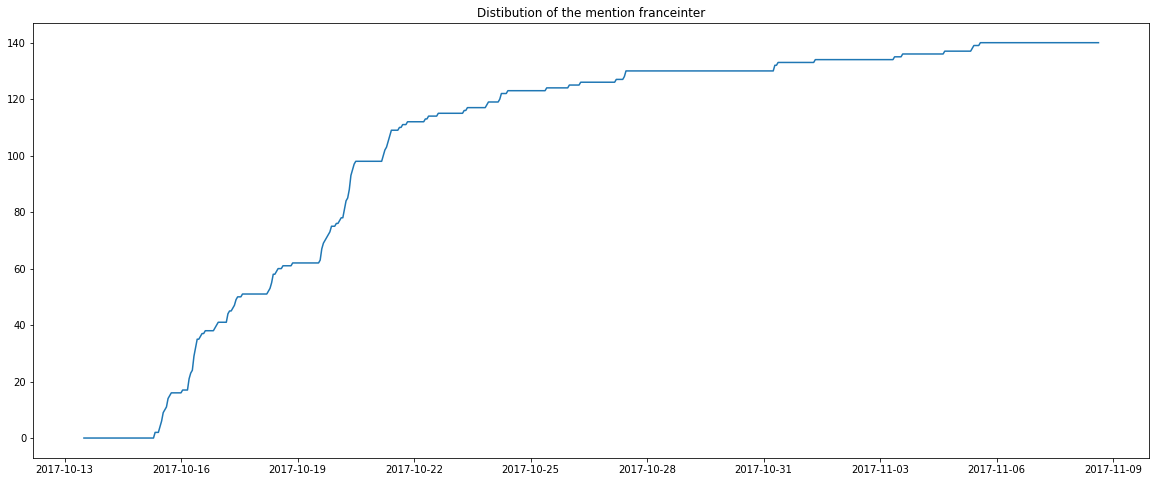

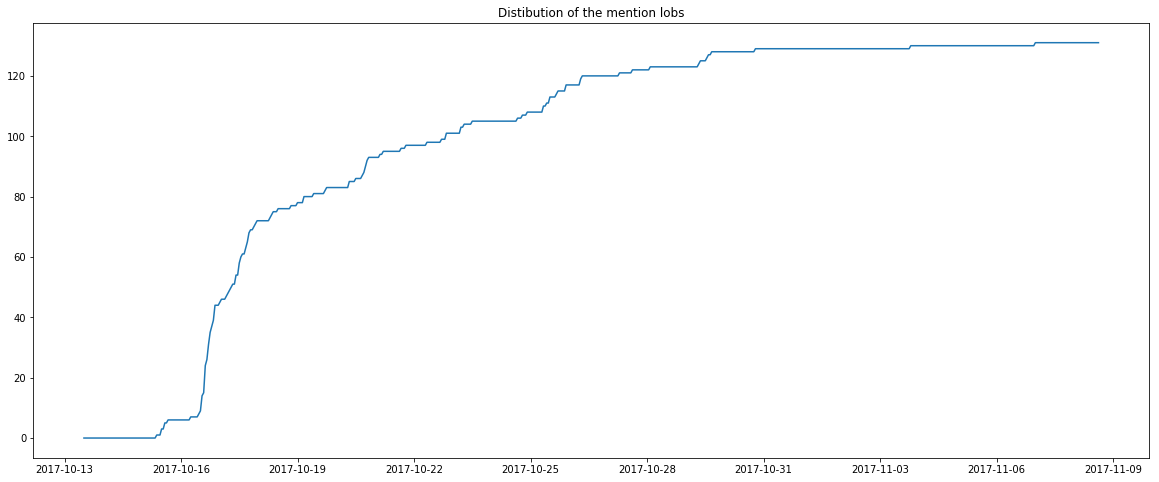

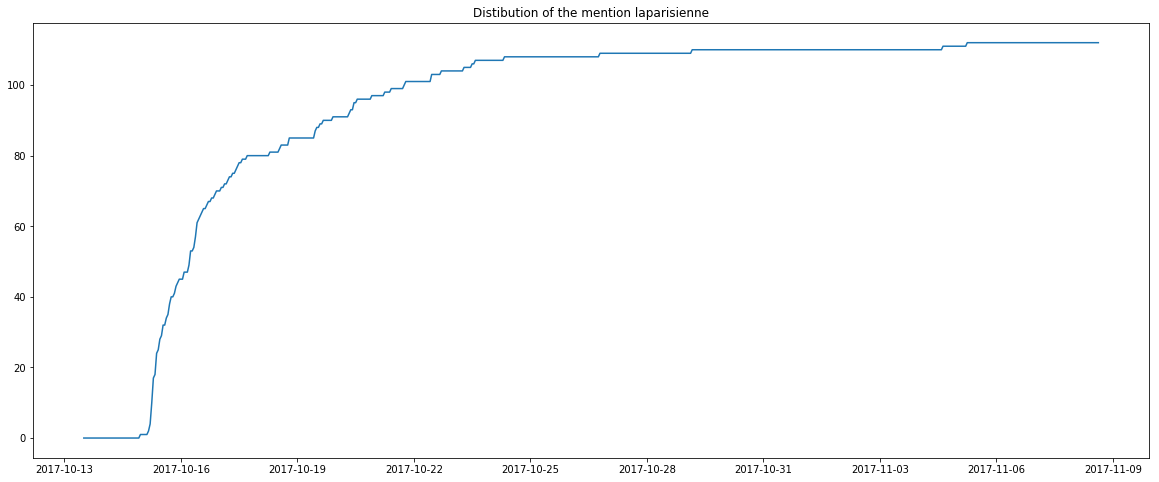

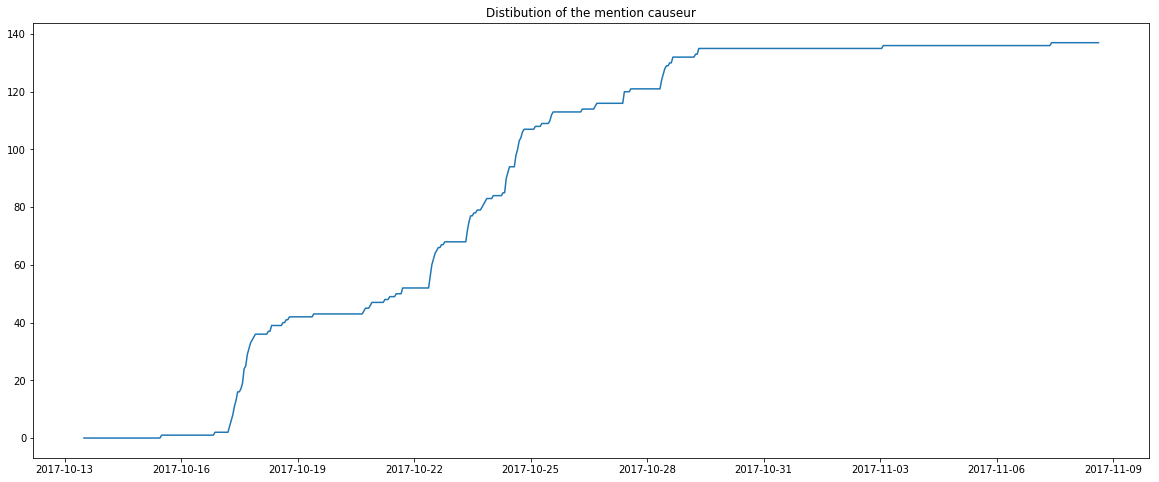

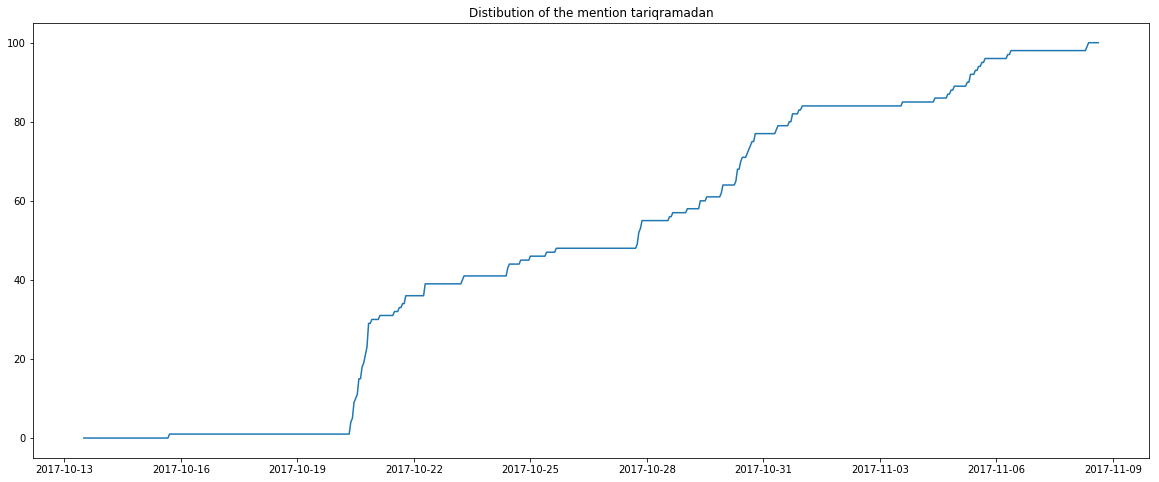

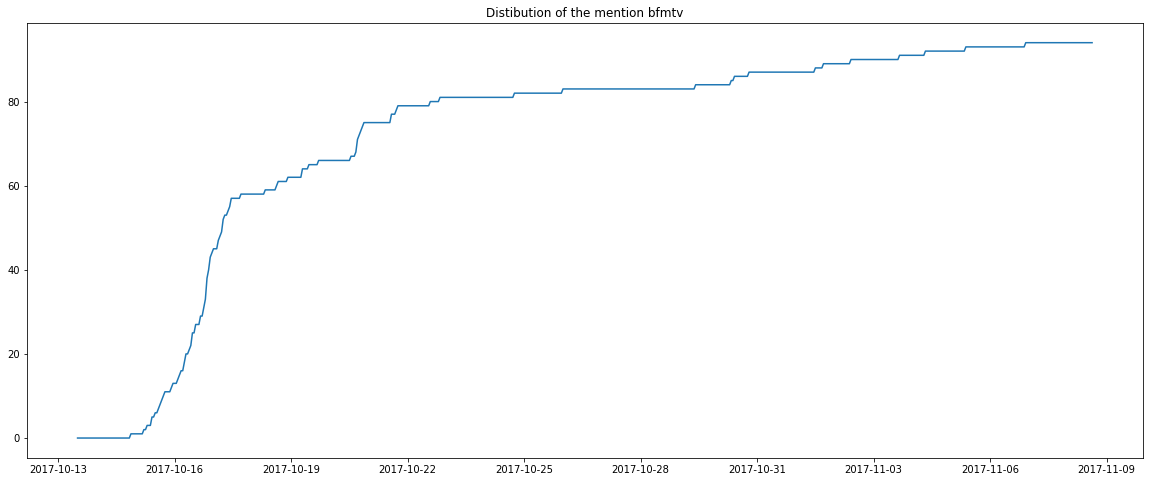

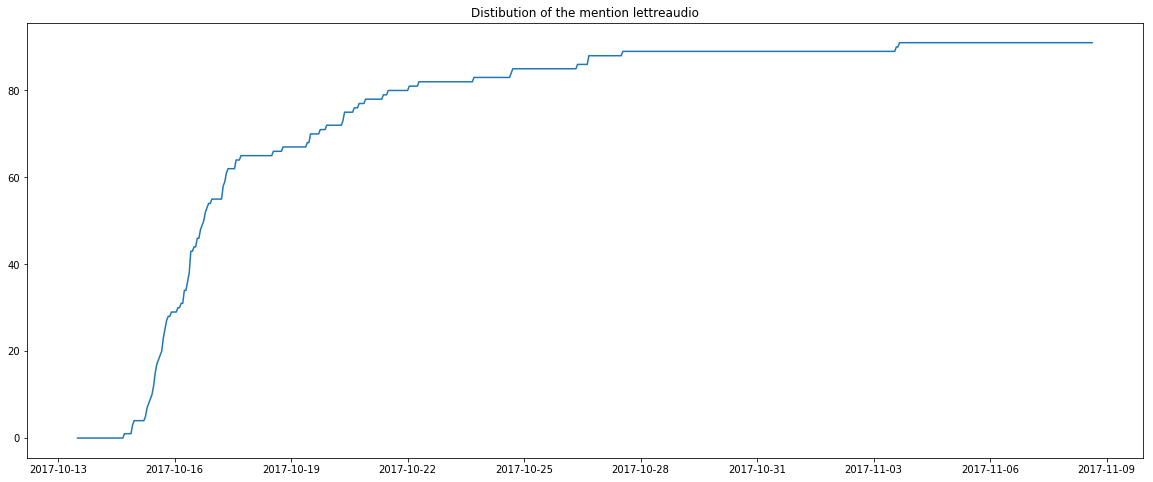

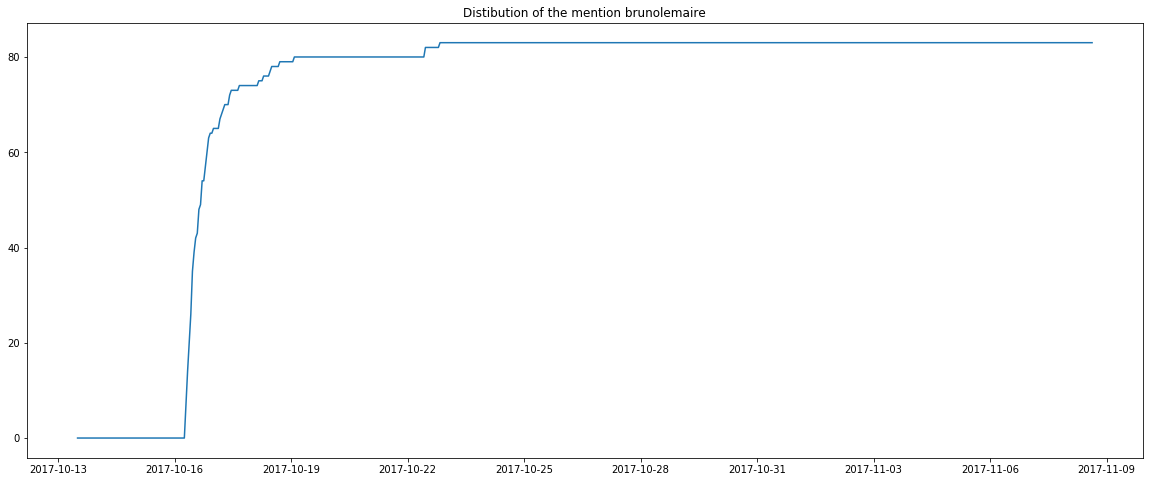

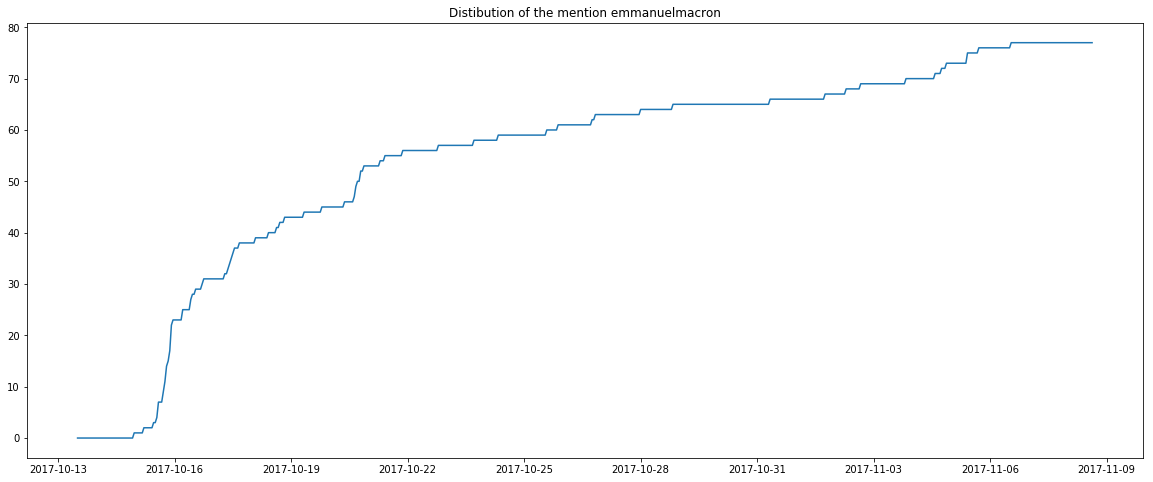

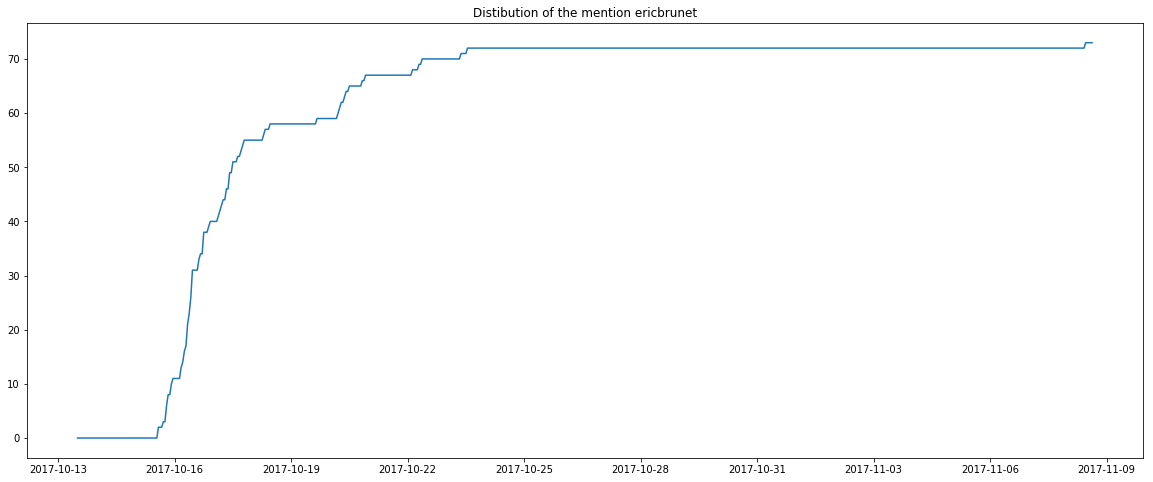

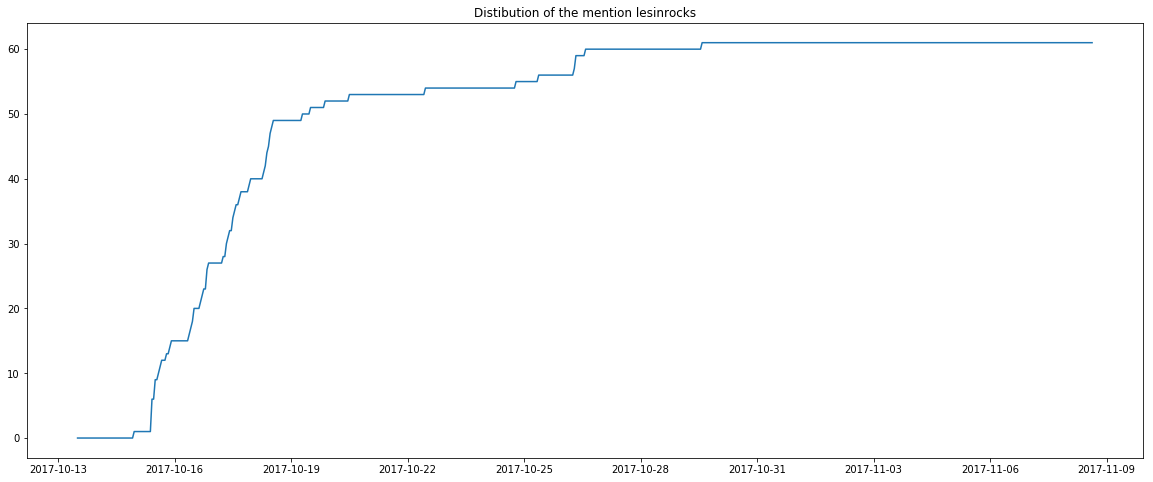

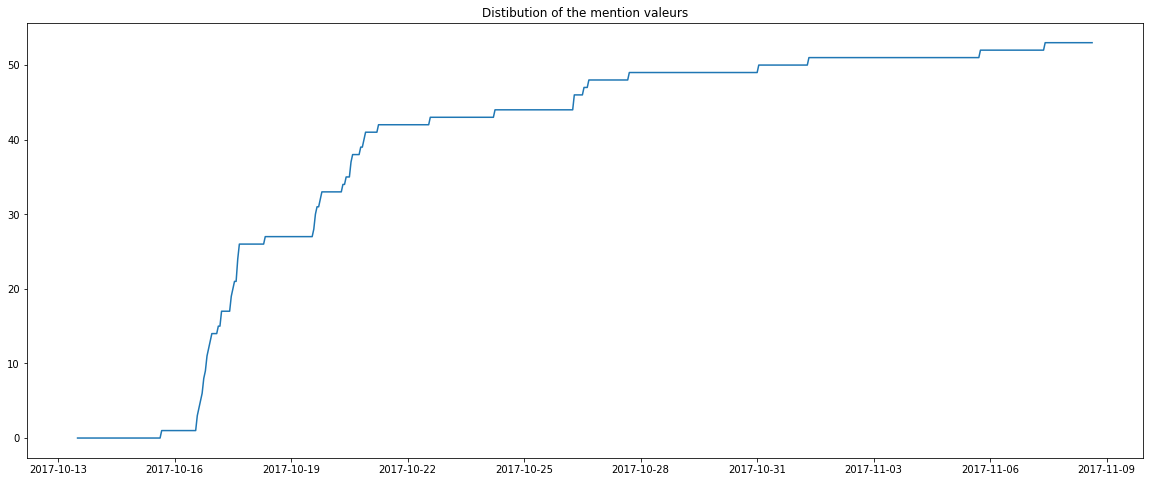

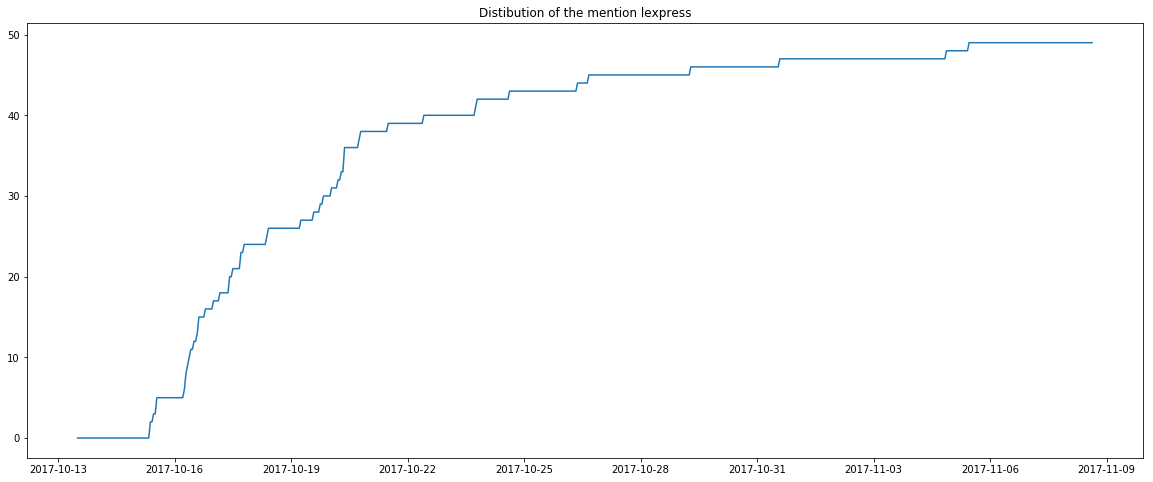

In [65]:
for text in bm[:20]:
    selecM=dataM.apply(counthashtag,text)
#we create the two tab for the plot
    t=selecM.index.tolist()
    height=selecM.values.tolist()
    cumuM=[height[0]]
    for i in range(len(height)-1):
        cumuM.append(cumuM[i]+height[i+1])
    fig2 = plt.figure(figsize = (20, 8))
    width=0.1
    plt.plot(t, cumuM)
    titre='Distibution of the mention '+ str(text)
    plt.title(titre)
    plt.show()